# 1. Introduction

The goal of this notebook is to demonstrate performning stock prediction using Face books prophet model. 

### History of Facebook Prophet
* Developed in 2017 by Facebook developers
* Is an additive regression model that decomposes time series data into trend, seasonality, and holiday effects
* It includes a yearly seasonal component modeled using Fourier series and a weekly seasonal component modeled using dummy variables.
* Prophet is used in many applications across Facebook, including predicting sales in e-commerce and forecasting weather patterns.

### 1.1 Documentation
* https://facebook.github.io/prophet/docs/quick_start.html
* https://pandas-datareader.readthedocs.io/en/latest/

# 2. Project Setup

In [5]:
! pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/24/2b/834e9a347f2f0161e32a3c6125b8a1ebdf6ac33199a0ed3a0bdf1f0c296f/prophet-1.1.5-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/e8/e2/2ddc273e726680a3c816f9a05c6726d57d61820fa7ab4753ed282d0a8bbe/cmdstanpy-1.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/ca/41/b78b8e03730c0f7b8d7a16bc8bc107406a2ec968c2dc40358d4a6e59da1b/holidays-0.41-py3-none-any.whl.metadata
  Using cached holidays-0.41-py3-none-any.whl.metadata (21 kB)
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/93/e8/facde510585869b5ec694e8e0363ffe4eba067cb357a8398a55f6a1f8023/importlib_resources-6.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for stanio~=0.3.0 from https://files.pythonhosted.org/pack

In [7]:
! pip install pandas_datareader  

In [ ]:
! pip install yfinance

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas_datareader as web
import warnings
 
from prophet import Prophet

import yfinance as yf

# 3. Read stock data

In [68]:

tickername="AAPL"
# Download historical data for Apple (AAPL) from 2020 to 2023
ticker = yf.Ticker(tickername)
df = ticker.history(period="max")

df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.0,0.0


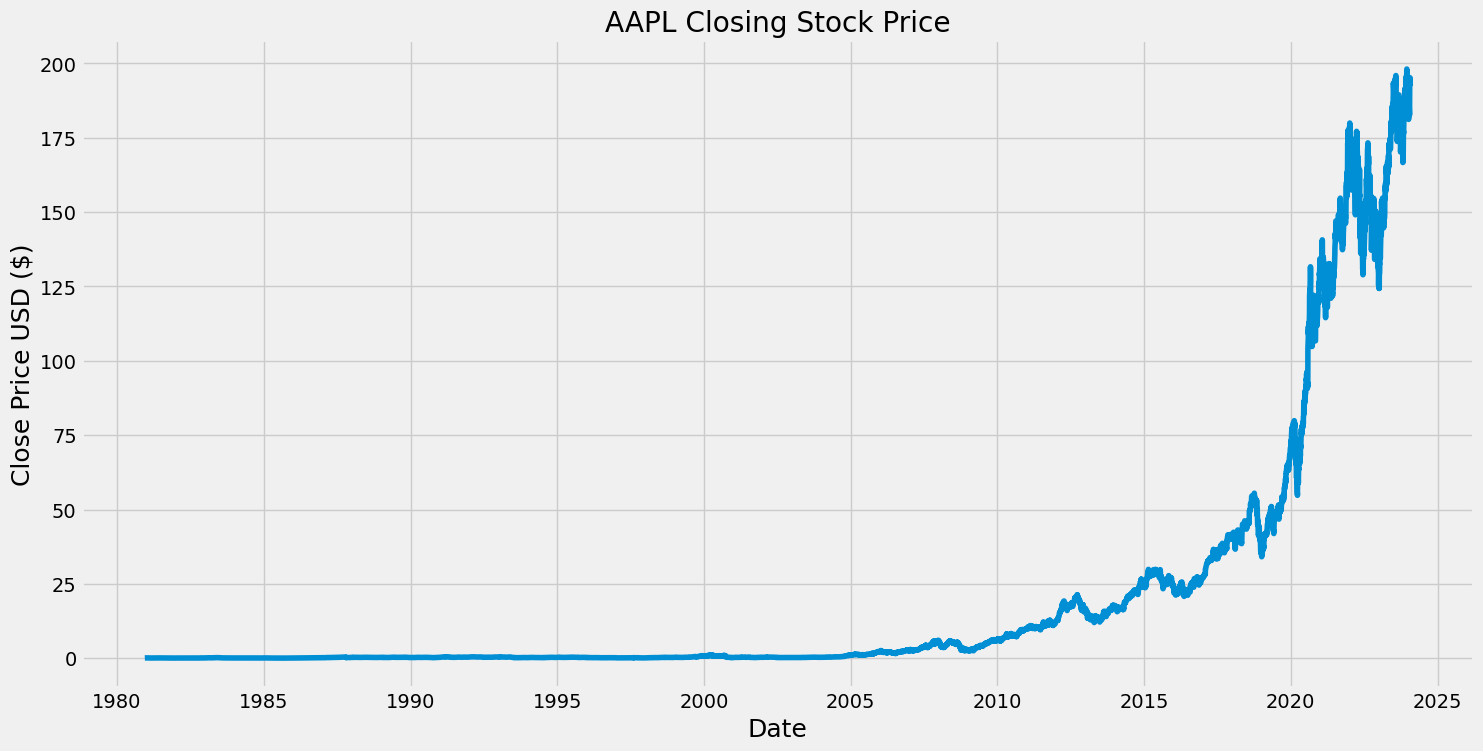

In [69]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title(f"{tickername} Closing Stock Price")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [70]:
# format data frame for input into input format
data = df[["Close"]]
data.reset_index(inplace=True)
data

,Date,Close
0,1980-12-12 00:00:00-05:00,0.099319
1,1980-12-15 00:00:00-05:00,0.094137
2,1980-12-16 00:00:00-05:00,0.087228
3,1980-12-17 00:00:00-05:00,0.089387
4,1980-12-18 00:00:00-05:00,0.091978
...,...,...
10866,2024-01-22 00:00:00-05:00,193.889999
10867,2024-01-23 00:00:00-05:00,195.179993
10868,2024-01-24 00:00:00-05:00,194.500000
10869,2024-01-25 00:00:00-05:00,194.169998


In [71]:
data = data.rename(columns = {"Date":"ds","Close":"y"})
data.head()

,ds,y
0,1980-12-12 00:00:00-05:00,0.099319
1,1980-12-15 00:00:00-05:00,0.094137
2,1980-12-16 00:00:00-05:00,0.087228
3,1980-12-17 00:00:00-05:00,0.089387
4,1980-12-18 00:00:00-05:00,0.091978


In [98]:
data['ds'] = data['ds'].dt.tz_localize(None)
data.head()

,ds,y
0,1980-12-12,0.099319
1,1980-12-15,0.094137
2,1980-12-16,0.087228
3,1980-12-17,0.089387
4,1980-12-18,0.091978


In [109]:
data = data.loc[data['ds'] >= '2023-06-01']
data.head()

,ds,y
10706,2023-06-01,179.610504
10707,2023-06-02,180.468216
10708,2023-06-05,179.101868
10709,2023-06-06,178.732864
10710,2023-06-07,177.346558


In [110]:

m = Prophet(daily_seasonality=True)
m.fit(data)

14:05:10 - cmdstanpy - INFO - Chain [1] start processing
14:05:10 - cmdstanpy - INFO - Chain [1] done processing


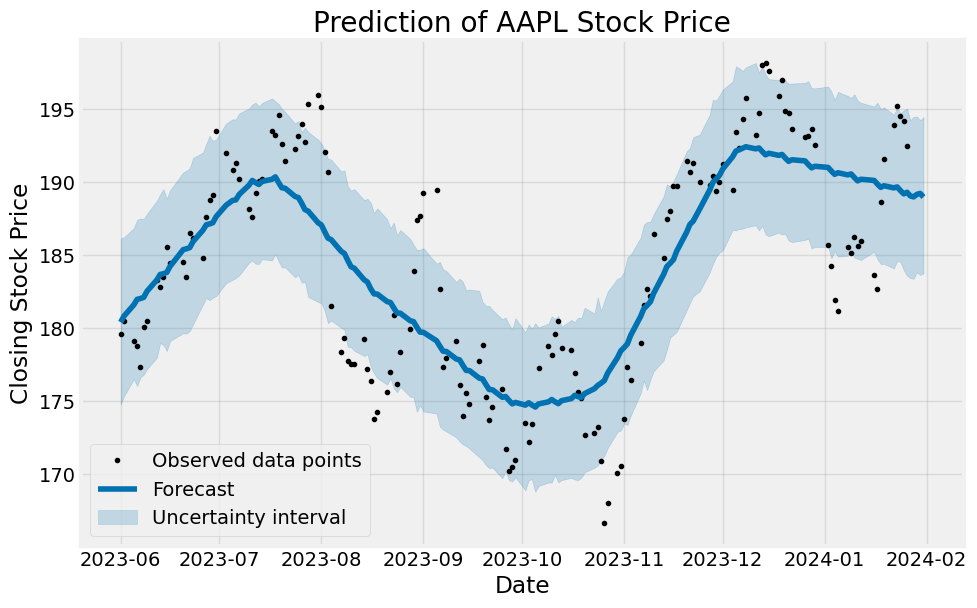

In [111]:
future = m.make_future_dataframe(periods=5)
predictions=m.predict(future)
m.plot(predictions)
plt.title(f"Prediction of {tickername} Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.legend()
plt.show()

In [112]:
data.tail()

,ds,y
10866,2024-01-22,193.889999
10867,2024-01-23,195.179993
10868,2024-01-24,194.500000
10869,2024-01-25,194.169998
10870,2024-01-26,192.419998


In [113]:
data.merge(predictions [['ds',  'yhat']], on=['ds'], how='inner').tail(13)

,ds,y,yhat
152,2024-01-09,185.139999,190.536346
153,2024-01-10,186.190002,190.287882
154,2024-01-11,185.589996,190.062584
155,2024-01-12,185.919998,190.171566
156,2024-01-16,183.630005,190.091313
157,2024-01-17,182.679993,189.842849
158,2024-01-18,188.630005,189.617551
159,2024-01-19,191.559998,189.726533
160,2024-01-22,193.889999,189.581724
161,2024-01-23,195.179993,189.646280


In [121]:
from prophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m, initial='200 days', period='200 days', horizon='10 days')
df_p = performance_metrics(df_cv)
mse = df_p['mse'].mean()  # Calculate mean MSE across folds

print("Mean Squared Error:", mse)

  0%|          | 0/1 [00:00<?, ?it/s]

14:06:14 - cmdstanpy - INFO - Chain [1] start processing
14:06:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 27.875240473289274
